In [5]:
import os
import tensorflow as tf


In [6]:
BASE_DIR = "./drive/MyDrive/lungs-class-data"


In [7]:
train_path = os.path.join(BASE_DIR, "train")
test_path = os.path.join(BASE_DIR, "test")
val_path = os.path.join(BASE_DIR, "val")

In [8]:
classes = os.listdir(train_path)
classes

['benign', 'malignant']

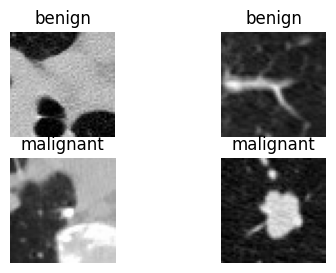

In [9]:
# prompt: show 2 images each in each classes with their label has class name

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rows = len(classes)
cols = 2

fig = plt.figure(figsize=(5, 3))
index = 1
for i in classes:
  class_path = os.path.join(train_path, i)
  img_names = os.listdir(class_path)
  for j in range(cols):
    img_path = os.path.join(class_path, img_names[j])
    img = mpimg.imread(img_path)
    fig.add_subplot(rows, cols, index)
    plt.imshow(img)
    plt.title(i)
    plt.axis('off')
    index += 1
plt.show()


In [10]:
# prompt: print the length of the train test and val dataset


for class_ in classes:
  print(f"{class_} Length of train dataset:", len(os.listdir(f"{train_path}/{class_}")))
  print(f"{class_} Length of test dataset:", len(os.listdir(f"{test_path}/{class_}")))
  print(f"{class_} Length of val dataset:", len(os.listdir(f"{val_path}/{class_}")))
  print()


benign Length of train dataset: 1042
benign Length of test dataset: 340
benign Length of val dataset: 373

malignant Length of train dataset: 1015
malignant Length of test dataset: 282
malignant Length of val dataset: 224



## Data Preparation And PreProcessing


In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the training dataset
train_dataset = image_dataset_from_directory(
    train_path,
    image_size=(224, 224),  # Resize images to a standard size (e.g., 224x224)
    batch_size=32,  # Set the batch size
    label_mode='binary'  # Since it's a binary classification problem
)

# Load the validation dataset
val_dataset = image_dataset_from_directory(
    val_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

# Load the test dataset
test_dataset = image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

def process_image(image, label):
    # Convert to grayscale
    image = tf.image.rgb_to_grayscale(image)
    # Normalize the image
    image = image / 255.0
    return image, label

# Apply the processing function to the datasets
train_dataset = train_dataset.map(process_image)
val_dataset = val_dataset.map(process_image)
test_dataset = test_dataset.map(process_image)


Found 2057 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 622 files belonging to 2 classes.


## Model Training

In [12]:
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=(224, 224,1), activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# Flatten the feature maps
model.add(Flatten())

# Generate a fully-cpnnected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
model.add(Dense(1, activation='sigmoid'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 219, 219, 32)        │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 104, 104, 32)        │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 47, 47, 32)          │          36,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          16,929 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,905 (359.00 KB)

 Trainable params: 91,905 (359.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# prompt: add earlystoppage

from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(
    train_dataset,
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_dataset,
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 29s 243ms/step - accuracy: 0.6330 - loss: 0.6506 - val_accuracy: 0.6231 - val_loss: 0.6877
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.7134 - loss: 0.5664 - val_accuracy: 0.6700 - val_loss: 0.7128
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.7685 - loss: 0.4953 - val_accuracy: 0.7471 - val_loss: 0.5946
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.8012 - loss: 0.4553 - val_accuracy: 0.7739 - val_loss: 0.5146
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.8199 - loss: 0.4184 - val_accuracy: 0.8191 - val_loss: 0.3948
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.8384 - loss: 0.3711 - val_accuracy: 0.8275 - val_loss: 0.3889
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.8553 - loss: 0.3389 - val_accuracy: 0.8124 - val_loss: 0.4133
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.8426 - loss: 0.3427 - val_accu

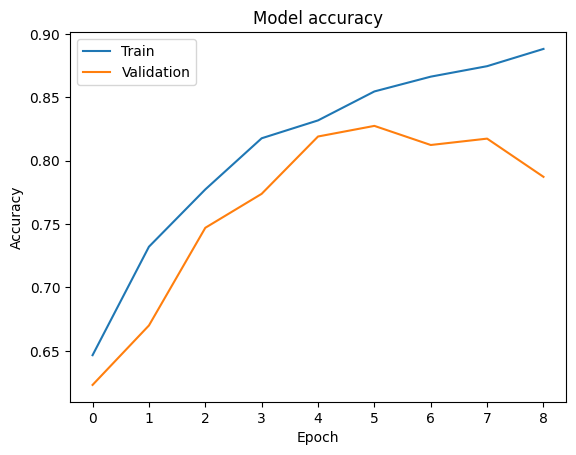

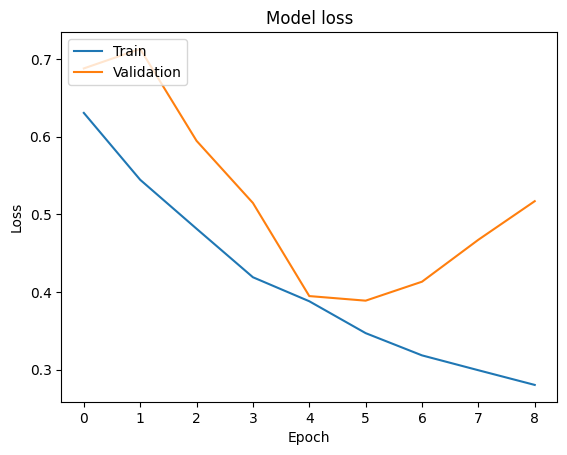

In [19]:
# prompt: plot history

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [14]:
#evaluate_model

def evaluate_model(model):
  return model.evaluate(test_dataset)[1]

model_1_acc = evaluate_model(model)
model_1_acc

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.8550 - loss: 0.3352


0.8424437046051025

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model as a sequence of layers
model_2 = Sequential()

# Convolutional layer with 32 filters of size 3x3 and ReLU activation
model_2.add(Conv2D(32, (3, 3), input_shape=(224, 224, 1), activation='relu'))

# Max pooling layer with 2x2 pool size
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Another convolutional layer with 64 filters of size 3x3 and ReLU activation
model_2.add(Conv2D(64, (3, 3), activation='relu'))

# Another max pooling layer with 2x2 pool size
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_2.add(Flatten())

# Fully-connected layer with 128 neurons
model_2.add(Dense(128, activation='relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model_2.add(Dense(1, activation='sigmoid'))

# Compile the model_2 for binary classification
model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the model_2 summary
print(model_2.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,906,945 (91.20 MB)

 Trainable params: 23,906,945 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
# prompt: add earlystoppage

from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with early stopping
history = model_2.fit(
    train_dataset,
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_dataset,
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - accuracy: 0.5678 - loss: 0.8207 - val_accuracy: 0.7253 - val_loss: 0.5809
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - accuracy: 0.7451 - loss: 0.5353 - val_accuracy: 0.7789 - val_loss: 0.5154
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.7918 - loss: 0.4757 - val_accuracy: 0.7571 - val_loss: 0.5179
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.7847 - loss: 0.4457 - val_accuracy: 0.7638 - val_loss: 0.4973
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.8214 - loss: 0.4121 - val_accuracy: 0.8007 - val_loss: 0.4630
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.8571 - loss: 0.3524 - val_accuracy: 0.8040 - val_loss: 0.4554
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.8701 - loss: 0.3128 - val_accuracy: 0.8090 - val_loss: 0.4623
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.8730 - loss: 0.2771 - val_accu

In [21]:
#evaluate_model_2
model_2_acc = evaluate_model(model_2)
model_2_acc

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.8642 - loss: 0.3406


0.848874568939209

In [22]:
# prompt: create a model_3 make it perfect

# Define the model as a sequence of layers
model_3 = Sequential()

# Convolutional layer with 32 filters of size 3x3 and ReLU activation
model_3.add(Conv2D(32, (3, 3), input_shape=(224, 224, 1), activation='relu', padding='same'))

# Max pooling layer with 2x2 pool size
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Another convolutional layer with 64 filters of size 3x3 and ReLU activation
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Another max pooling layer with 2x2 pool size
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Another convolutional layer with 128 filters of size 3x3 and ReLU activation
model_3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Another max pooling layer with 2x2 pool size
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_3.add(Flatten())

# Fully-connected layer with 256 neurons and ReLU activation
model_3.add(Dense(256, activation='relu'))

# Dropout layer to prevent overfitting
model_3.add(Dropout(0.5))

# Output layer with 1 neuron and sigmoid activation for binary classification
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model_3 for binary classification
model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the model_3 summary
print(model_3.summary())

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping
history = model_3.fit(
    train_dataset,
    epochs=20,  # Increased epochs for better training
    validation_data=val_dataset,
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)

# Evaluate the model
model_3_acc = evaluate_model(model_3)
print("Model 3 Accuracy:", model_3_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 224, 224, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,783,297 (98.36 MB)

 Trainable params: 25,783,297 (98.36 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 262ms/step - accuracy: 0.5212 - loss: 0.7706 - val_accuracy: 0.6784 - val_loss: 0.6290
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.6788 - loss: 0.6008 - val_accuracy: 0.7320 - val_loss: 0.5286
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.7206 - loss: 0.5498 - val_accuracy: 0.7420 - val_loss: 0.4989
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.7713 - loss: 0.4798 - val_accuracy: 0.7873 - val_loss: 0.4555
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.7927 - loss: 0.4370 - val_accuracy: 0.7822 - val_loss: 0.4938
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - accuracy: 0.8136 - loss: 0.4074 - val_accuracy: 0.8007 - val_loss: 0.4529
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - accuracy: 0.8707 - loss: 0.3084 - val_accuracy: 0.8174 - val_loss: 0.4281
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.8990 - loss: 0.2474 - val

## Show all model Performance

In [24]:
import pandas as pd

pd.DataFrame({"Model": ["Model 1", "Model 2", "Model 3"],
             "Accuracy": [model_1_acc, model_2_acc, model_3_acc]})

,Model,Accuracy
0,Model 1,0.842444
1,Model 2,0.848875
2,Model 3,0.852090


### Model 3 has the best accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


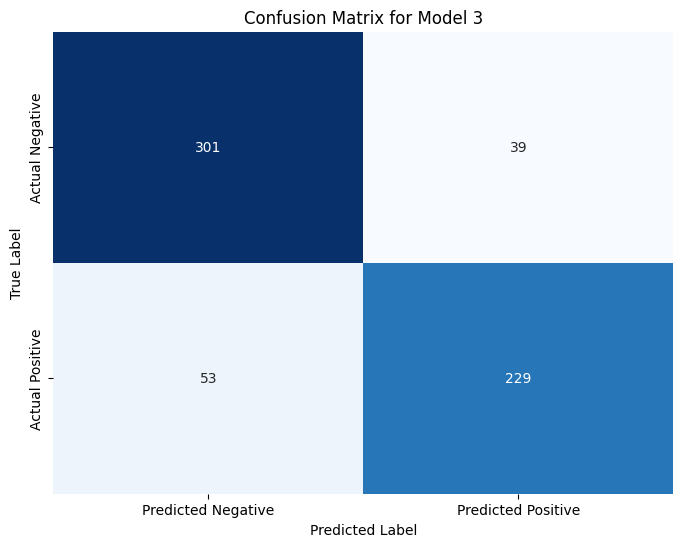

In [26]:
# prompt: create a confusion matrix for model_3 with seaborn heatmap

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'test_dataset' is your test dataset
y_true = []
y_pred = []

for images, labels in test_dataset:
  predictions = model_3.predict(images)
  y_pred.extend((predictions > 0.5).astype(int).flatten())
  y_true.extend(labels.numpy().flatten())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Model 3')
plt.show()


In [32]:
model_3.save("./drive/MyDrive/model_3.h5")

In [40]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('./drive/MyDrive/model_3.h5')

# Define the image processing function (grayscale conversion and normalization)
def preprocess_image(image):
    # Resize the image to 224x224
    image = tf.image.resize(image, (224, 224))
    # Convert to grayscale
    image = tf.image.rgb_to_grayscale(image)
    # Normalize the image
    image = image / 255.0
    # Add a batch dimension (required for prediction)
    image = tf.expand_dims(image, axis=0)
    return image

# Define the prediction function
def predict(image):
    # Preprocess the image
    processed_image = preprocess_image(image)
    # Get the prediction
    prediction = model.predict(processed_image)
    # Return the result
    return prediction
    # if prediction[0] > 0.5:
    #     return "Malignant"
    # else:
    #     return "Benign"

# Define the Gradio interface
interface = gr.Interface(
    fn=predict,  # The function to be called
    inputs=gr.Image(),  # Input type is an image
    outputs=gr.Label(num_top_classes=2),  # Output type is text
    title="Lung Cancer Classification",
    description="Upload an image of a lung X-ray to classify it as malignant or benign."
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5564d04671e7a1fb9c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
